# Data

These examples illustrate the data format used in Brain-Score. Note that datasets loaded directly are often not fully pre-processed (e.g. neuroids with low signal-to-noise ratio are not filtered, repetitions are not averaged, difficult stimuli are not pre-selected etc.).
For model comparisons, please use benchmarks instead.

## Neural data

We can load a dataset (referred to as a "data assembly") using the `load_dataset` method.
In the following, we load public neural data published in Majaj*, Hong*, et al. 2015.

In [1]:
import brainscore_vision
neural_data = brainscore_vision.load_dataset("MajajHong2015.public")
neural_data = neural_data.transpose('presentation', 'neuroid', 'time_bin')
neural_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (presentation: 148480, neuroid: 256, time_bin: 1)>
array([[[ 0.06092933],
        [-0.72559214],
        [ 0.42031842],
        ...,
        [-0.18637353],
        [ 0.28050217],
        [ 0.30726328]],

       [[-0.8479065 ],
        [ 0.89549875],
        [ 0.9519652 ],
        ...,
        [-2.260826  ],
        [-1.1872205 ],
        [ 0.35321778]],

       [[-1.618728  ],
        [-0.7792393 ],
        [-1.3977592 ],
        ...,
...
        ...,
        [ 0.6354223 ],
        [ 0.42337415],
        [-2.2552547 ]],

       [[-0.83211136],
        [-1.158598  ],
        [-0.17778037],
        ...,
        [-1.6090839 ],
        [ 0.0775381 ],
        [ 1.0052351 ]],

       [[-0.83211136],
        [-0.7954789 ],
        [-0.8635877 ],
        ...,
        [ 0.6354223 ],
        [-0.614134  ],
        [-0.2989609 ]]], dtype=float32)
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - region           (neuroid) object 'IT' 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT'
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - repetition       (presentation) int64 0 18 18 18 18 18 ... 16 16 16 17 17 17
  - stimulus         (presentation) int64 0 426 427 428 429 ... 2569 2566 0 1 2
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - id               (presentation) int64 1 418 419 420 421 ... 3197 641 642 643
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - s                (presentation) float64 1.0 1.0 1.0 ... 1.246 1.296 0.9114
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - filename         (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... 0.02724 -10.4
  - tz               (presentation) float64 0.0 0.0 0.0 ... -0.269 -0.599 0.211
  - category_name    (presentation) object 'Cars' 'Faces' ... 'Fruits' 'Fruits'
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  - ty               (presentation) float64 0.0 0.0 0.0 ... -0.191 -0.213 0.277
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - object_name      (presentation) object 'car_astra' 'face0' ... 'apple'
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 -0.0 -0.0 ... 0.02724 -10.4
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - rxz              (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_end     (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  dicarlo.hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

This dataset illustrates some core components of the Brain-Score data structure:
* The dataset is organized in a [xarray DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html). `xarray` is a multi-dimensional extension of [pandas](https://pandas.pydata.org/community/ecosystem.html#xarray) and allows us to maintain metadata information along with the raw data values. This is especially useful for a holistic view of the data, and ensuring indexing over metadata works as intended.
* The dimensions of the dataset are `presentation`, `neuroid`, and `time_bin`. `presentation` refers to the presentation of stimuli with metadata on e.g. the object category, the position of the object in the image, and the background. `neuroid` contains information about the neural recording site, such as the animal, the region, and the location of the electrodes. Finally, `time_bin` informs us about the time in milliseconds from when neural responses were collected. In this case, the dataset is filtered to the average spike rates between `70-170` ms.
* The dataset attributes include the `StimulusSet` with all the images that were shown in the experiment (referenced by `stimulus_id` in the `presentation` dimension).

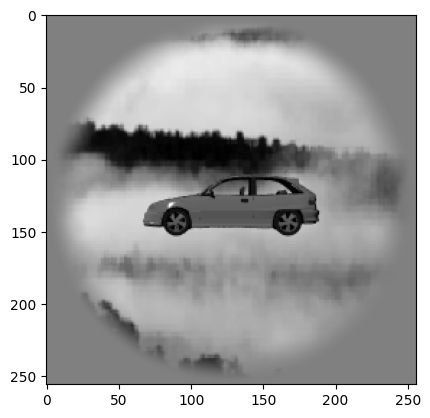

In [2]:
%matplotlib inline
from matplotlib import pyplot, image

stimulus_set = neural_data.attrs['stimulus_set']
local_path = stimulus_set.get_stimulus(neural_data['stimulus_id'].values[0])
img = image.imread(local_path)
pyplot.imshow(img)
pyplot.show()

### Preprocessing

For model comparisons most benchmarks pre-process the data with e.g. some of the following steps:

1. filter for neural sites from inferotemporal cortex,

2. average across repeated presentations of the same stimulus,

3. get rid of the single time_bin dimension.

In [3]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition

benchmark_data = neural_data.sel(region='IT')  # (1)
benchmark_data = average_repetition(benchmark_data)  # (2)
benchmark_data = benchmark_data.squeeze('time_bin')  # (3)
benchmark_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (presentation: 3200, neuroid: 168)>
array([[ 0.08579675, -0.40017223, -0.48299602, ...,  0.44299307,
         0.23595507,  0.00478193],
       [ 0.1961998 ,  0.10559011,  0.4308994 , ...,  0.25456306,
        -0.10369828,  0.40033734],
       [ 0.01543091, -0.5408685 , -0.32352096, ...,  0.27328926,
         0.24315262, -0.05489631],
       ...,
       [ 0.3541822 ,  0.29962146,  0.6635341 , ...,  0.3615814 ,
         0.31918818,  0.27234784],
       [ 0.11517322, -0.01251979, -0.55534226, ...,  0.2850026 ,
         0.34246004,  0.15940946],
       [-0.25128886, -0.22716913, -0.40659687, ..., -0.01127249,
        -0.24650788, -0.16409135]], dtype=float32)
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
    time_bin         object (70, 170)
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - stimulus         (presentation) int64 212 161 1734 1634 ... 990 253 1818 323
  - stimulus_id      (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - id               (presentation) int64 210 802 2367 2268 ... 894 2451 964
  - background_id    (presentation) object '561c84a23fcc11df50a1c441a23d19cb4...
  - s                (presentation) float64 1.0 1.133 0.9617 ... 0.916 0.7786
  - image_file_name  (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - filename         (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - rxy              (presentation) float64 -0.0 19.93 -41.9 ... 35.54 -34.78
  - tz               (presentation) float64 0.0 0.009 0.549 ... 0.297 0.485
  - category_name    (presentation) object 'Boats' 'Animals' ... 'Cars' 'Tables'
  - rxz_semantic     (presentation) float64 0.0 43.35 13.67 ... 36.42 -8.024
  - ty               (presentation) float64 0.0 0.068 -0.263 ... -0.12 0.173
  - ryz              (presentation) float64 -0.0 38.46 23.85 ... 6.701 -25.66
  - object_name      (presentation) object 'ship2' 'bear' ... 'table0'
  - variation        (presentation) int64 0 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 109.9 -131.9 ... 125.5 -34.78
  - ryz_semantic     (presentation) float64 -0.0 38.46 23.85 ... 6.701 -25.66
  - rxz              (presentation) float64 0.0 43.35 13.67 ... 36.42 -8.024
Attributes:
    stimulus_set_identifier:  dicarlo.hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

Note how the data now contains 3200 images (before pre-processing: 148480) and 168 neural sites (before pre-processing: 256, which included V4 sites for this dataset).

In [4]:
print("shape", benchmark_data.shape)

shape (3200, 168)


The data used in benchmarks is typically pre-processed in ways like these (with often additional steps such as filtering for high signal-to-noise ratio).
For instance, the target assembly for the benchmark `'MajajHong2015public.IT-pls'`
is similar to our pre-processed version here:

In [5]:
from brainscore_vision import load_benchmark

benchmark = load_benchmark('MajajHong2015public.IT-pls')
benchmark_assembly = benchmark._assembly
print("shape", benchmark_assembly.shape)


shape (3200, 168)


## Behavioral data

For consistency, datasets of behavioral responses are organized in the same `xarray` data structure but with typically only a single `presentation` dimension which refers to the presentation of a stimulus to a subject. The values in this case then correspond to the responses (e.g. categories) of subjects to the stimuli.

Here's a sample behavioral dataset:

In [6]:
from brainscore_vision import load_dataset

behavioral_data = load_dataset('Rajalingham2018.public')
print(behavioral_data)

<xarray.BehavioralAssembly 'dicarlo.Rajalingham2018.public' (presentation: 585511)>
array(['MB28699', '22_acoustic_guitar', 'MB27346', ...,
       'antique_furniture_item_18', 'MB29874', 'MB28699'], dtype=object)
Coordinates:
  * presentation      (presentation) MultiIndex
  - sample_obj        (presentation) object 'MB28699' ... 'MB28699'
  - dist_obj          (presentation) object 'dromedary' ... 'dromedary'
  - choice            (presentation) object 'MB28699' ... 'MB28699'
  - image_id          (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d0...
  - WorkerID          (presentation) object 'AIW6ALUI8LBXV' ... 'A2OF0GTKWKM2T5'
  - AssignmentID      (presentation) object '2W9GYQ4J3NABXRMPS3FY2IT39ZKCPJ' ...
  - truth             (presentation) object 'MB28699' ... 'MB28699'
  - stimulus_id       (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d0...
  - image_label       (presentation) object 'MB28699' ... 'MB28699'
  - filename          (presentation) object 'acaf817c42d2a

Behavioral data can be dealt in much the same way as described above for the neural data.

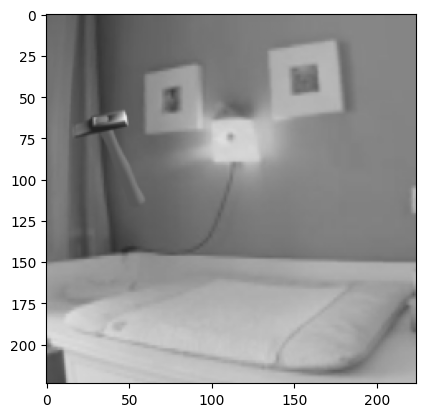

In [7]:
%matplotlib inline
from matplotlib import pyplot, image

stimulus_set = behavioral_data.attrs['stimulus_set']
local_path = stimulus_set.get_stimulus(behavioral_data['stimulus_id'].values[0])
img = image.imread(local_path)
pyplot.imshow(img)
pyplot.show()

In [8]:
print("# unique stimuli:", len(set(behavioral_data['stimulus_id'].values)))
print("# unique subjects:", len(set(behavioral_data['WorkerID'].values)))

# unique stimuli: 2160
# unique subjects: 1391


# Metrics
To compare two datasets (e.g. brain recordings and model predictions), we use *metrics* that compute a similarity score.

### Pre-defined metrics

Brain-Score comes with many standard metrics used in the field.
For instance, the *neural predictivity metric* (here with `ridge` regression)
(1) uses linear regression to map between two matrices (e.g. from model activations to neural firing rates),
(2) computes the correlation between predicted and actual firing rates on held-out images, and
(3) cross-validates 1 and 2 to estimate a generalization error.

In [9]:
from brainscore_vision import load_metric

metric = load_metric('ridge')

All metrics have a `__call__` method which takes as input two sets of measurements and produces a score.
See e.g. below for the result of running the `ridge` neural predictivity metric on "two" dummy datasets.

In [10]:
import numpy as np
from numpy.random import RandomState

from brainio.assemblies import NeuroidAssembly

rnd = RandomState(0)  # seed for reproducibility
assembly = NeuroidAssembly((np.arange(30 * 25) + rnd.standard_normal(30 * 25)).reshape((30, 25)),
                           coords={'stimulus_id': ('presentation', np.arange(30)),
                                   'object_name': ('presentation', ['a', 'b', 'c'] * 10),
                                   'neuroid_id': ('neuroid', np.arange(25)),
                                   'region': ('neuroid', ['V1'] * 25)},
                           dims=['presentation', 'neuroid'])
source, target = assembly, assembly  # we're testing how well the metric can predict the dataset itself
score = metric(source=source, target=target)
print(score)

cross-validation: 100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


<xarray.Score ()>
array(0.99999893)
Attributes:
    raw:      <xarray.Score (split: 10, neuroid: 25)>\narray([[0.99999998, 0....
    error:    <xarray.Score ()>\narray(7.31630414e-07)


The overall result here is a score close to 1. Note that this aggregate score averages over cross-validation splits as well as neural sites (`neuroids`).
We can also check the raw values, i.e. the value per split and per neuroid.

In [11]:
print(score.raw)

<xarray.Score (split: 10, neuroid: 25)>
array([[0.99999998, 0.99999989, 0.99999983, 1.        , 0.99999891,
        0.99999917, 0.99999993, 0.99999956, 0.99999942, 0.99999974,
        0.99999999, 0.99999915, 0.99999879, 0.9999982 , 0.99999911,
        0.99999877, 0.99999991, 0.9999998 , 0.99999998, 0.99999958,
        0.99999993, 0.99999995, 1.        , 0.99999968, 0.99999995],
       [1.        , 0.99999993, 0.99999997, 0.99999814, 0.9999966 ,
        0.99999999, 0.99999991, 0.99999896, 0.99999927, 0.9999978 ,
        0.99999992, 0.99999877, 0.9999997 , 0.99999992, 0.99999817,
        1.        , 0.99999991, 0.99999991, 1.        , 0.99999989,
        0.99999844, 0.99999981, 0.99999797, 0.99999852, 0.99999998],
       [0.99999995, 0.99999718, 0.99999993, 0.99999825, 0.99999958,
        0.9999935 , 0.99999814, 0.99999991, 0.99999363, 0.99999946,
        0.99999964, 0.99999453, 0.99999994, 0.9999985 , 0.99999443,
        0.99999939, 0.99999995, 0.99999222, 0.99999255, 0.99999937,
      

#### RDM

The RDM metric is another commonly used method which does not require any fitting.

In [12]:
from brainscore_vision import load_metric

rdm_metric = load_metric('rdm')
rdm_score = rdm_metric(assembly1=assembly, assembly2=assembly)
print(rdm_score)

<xarray.Score ()>
array(1.)


In practice, we recommend using the `rdm_cv` metric which includes cross-validation to estimate an error:

In [13]:
rdm_cv = load_metric('rdm_cv')
rdm_cv_score = rdm_cv(assembly1=assembly, assembly2=assembly)
print(rdm_cv_score)

cross-validation: 100%|██████████| 10/10 [00:00<00:00, 46.13it/s]

<xarray.Score ()>
array(1.)
Attributes:
    raw:      <xarray.Score (split: 10)>\narray([1., 1., 1., 1., 1., 1., 1., ...
    error:    <xarray.Score ()>\narray(0.)


### Custom metrics

It is relatively straight-forward to define your own metrics. All that is required is to implement the [`Metric` interface](https://brain-score-core.readthedocs.io/en/latest/modules/metrics.html#brainscore_core.metrics.Metric). Specifically, every metric needs to implement a `__call__` method which accepts two data assemblies and outputs a [`Score`](https://brain-score-core.readthedocs.io/en/latest/modules/metrics.html#brainscore_core.metrics.Score).

For instance, here is a metric that computes the Euclidean distance of regressed and target neural sites.

In [14]:
from brainscore_core import Metric, Score
from brainio.assemblies import DataAssembly


class DistanceMetric(Metric):
    def __call__(self, source: DataAssembly, target: DataAssembly) -> Score:
        # ensure metadata is aligned
        source = source.sortby('stimulus_id').sortby('neuroid_id')
        target = target.sortby('stimulus_id').sortby('neuroid_id')
        assert (source['stimulus_id'].values == target['stimulus_id'].values).all()
        assert (source['neuroid_id'].values == target['neuroid_id'].values).all()
        # compute distance
        difference = np.abs(target.values - source.values)  # lower is better
        score = Score(difference, coords=target.coords, dims=target.dims)  # include metadata
        score = score.mean('presentation').median('neuroid')  # aggregate over stimuli and neural sites
        score = 1 - score  # invert so that higher is better (note that we would also need to define a floor so that the score is ∈[0,1]
        return score


metric = DistanceMetric()
score = metric(assembly, assembly)
print(score)

<xarray.Score ()>
array(1.)


# Benchmarks

Benchmarks combine a dataset, a metric, and an experimental paradigm.
They take a model candidate as input and output a score that measures how similar the model predictions under the experimental paradigm are to the data as evaluated by the metric

### Pre-defined benchmarks

The Brain-Score community has defined many benchmarks, which models can be scored on. We can thus easily test a new or existing model on a variety of experimental datasets. To achieve this scaling, all models implement the model interface, and all benchmarks in turn only use methods from this interface.

In [15]:
from brainscore_vision import score

similarity_score = score(model_identifier='alexnet', benchmark_identifier='MajajHong2015public.IT-pls')
similarity_score

cross-validation: 100%|██████████| 10/10 [04:10<00:00, 25.05s/it]


<xarray.Score ()>
array(0.50480277)
Attributes:
    error:                 <xarray.Score ()>\narray(0.00269362)
    raw:                   <xarray.Score ()>\narray(0.57962116)\nAttributes:\...
    ceiling:               <xarray.DataArray ()>\narray(0.81579938)\nAttribut...
    model_identifier:      alexnet
    benchmark_identifier:  MajajHong2015public.IT-pls
    comment:               layers: {'IT': 'features.12'}

This score already aggregates over neural sites and cross-validation splits, and normalizes with respect to an estimated noise ceiling.

We can also check the un-ceiled, per-split, and per-neural-site values:

In [16]:
unceiled_score = similarity_score.raw
individual_values = unceiled_score.raw
print(individual_values)

<xarray.Score (split: 10, neuroid: 168)>
array([[0.34887369, 0.46601301, 0.45883724, ..., 0.65668614, 0.70176186,
        0.72235326],
       [0.31144404, 0.52688285, 0.50384677, ..., 0.66639365, 0.67149065,
        0.68811384],
       [0.34135641, 0.43913901, 0.48682732, ..., 0.69500215, 0.7260355 ,
        0.71180254],
       ...,
       [0.21055581, 0.50588129, 0.49815291, ..., 0.67644017, 0.66275208,
        0.68777016],
       [0.30868527, 0.3778854 , 0.47125337, ..., 0.70168043, 0.72231718,
        0.73980201],
       [0.26001712, 0.44765998, 0.42908116, ..., 0.6753077 , 0.72488176,
        0.75500281]])
Coordinates:
  * split       (split) int64 0 1 2 3 4 5 6 7 8 9
  * neuroid     (neuroid) MultiIndex
  - neuroid_id  (neuroid) object 'Chabo_L_A_2_4' ... 'Tito_L_M_9_8'
  - arr         (neuroid) object 'A' 'A' 'A' 'A' 'A' 'A' ... 'M' 'M' 'M' 'M' 'M'
  - col         (neuroid) int64 4 3 5 0 1 2 3 4 5 6 2 ... 4 5 6 7 8 1 3 4 5 7 8
  - hemisphere  (neuroid) object 'L' 'L' 'L' 'L' 'L' 

### Custom benchmarks

We can also define our own benchmarks.
To interface with Brain-Score, each benchmark needs to implement the [`Benchmark` interface](https://brain-score-core.readthedocs.io/en/latest/modules/benchmarks.html). We especially need to write a `__call__` method that takes a model candidate as input and outputs score.

Each benchmark follows the following steps:
1. reproduce the primate experiment on the model (e.g. show the same stimuli)
2. apply a similarity metric to compare model predictions with biological measurements
3. normalize the similarity score with the ceiling, i.e. an upper bound on how well we would expect the best possible model to perform

The following example implements a simple benchmark that show-cases these three steps.

In [17]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition
from brainscore_core import Score
from brainscore_core.benchmarks import Benchmark
from brainscore_vision import load_dataset, load_model, load_metric, load_ceiling, BrainModel
from brainscore_vision.benchmark_helpers.screen import place_on_screen


# Let's say, we want to test models' match to V1 recordings with an RDM metric.
# We'll use the Freeman*, Ziemba*, et al. 2013 data.

class MyBenchmark(Benchmark):
    def __init__(self):
        self._assembly = load_dataset('MajajHong2015.public').sel(region='IT').squeeze('time_bin')
        self._metric = load_metric('rdm_cv')
        self._ceiler = load_ceiling('internal_consistency')

    @property
    def identifier(self):
        return "my-benchmark-name"

    def __call__(self, candidate: BrainModel) -> Score:
        # All candidate models follow the BrainModel interface, so we can easily treat all models the same way.
        # (1) reproduce the experiment on the model.
        candidate.start_task(task=BrainModel.Task.passive)
        candidate.start_recording(recording_target="IT", time_bins=[(70, 170)])
        # since different models can have different fields of view, we adjust the image sizes accordingly.
        stimulus_set = place_on_screen(self._assembly.stimulus_set,
                                       target_visual_degrees=candidate.visual_degrees(), source_visual_degrees=8)
        predictions = candidate.look_at(stimuli=stimulus_set)
        # (2) compute similarity between predictions and measurements
        assembly = average_repetition(self._assembly)  # average over repetitions
        unceiled_score = self._metric(predictions, assembly)
        # (3) normalize by our estimate of how well the ideal model could do
        ceiled_score = unceiled_score / self.ceiling
        return ceiled_score

    @property
    def ceiling(self):
        print("Computing ceiling")
        return self._ceiler(self._assembly)


my_benchmark = MyBenchmark()
model = load_model('alexnet')
score = my_benchmark(model)
print(score)

cross-validation: 100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


Computing ceiling


cross-validation: 100%|██████████| 10/10 [00:50<00:00,  5.02s/it]

<xarray.Score ()>
array(0.36174365)
